# Project Three - Frisbee Flight
Adi Sudhakar and George Tighe

In [1]:
from modsim import *

In [71]:
#launch = SweepSeries()
#launch = linrange(0, 95, 5)
#aattack = SweepSeries()
#aattack = linrange(-10, 15, 5)
launch = 10*pi/180
aattack = 10*pi/180
print(launch)
print(aattack)

0.17453292519943295
0.17453292519943295


In [72]:
system = System(m = 0.175, d = 0.27, v0 = 15, launch = launch, aattack = aattack, g = 9.8, 
                p_air = 1.23, dt = 0.05)
state = State(xpos = 0, zpos = 1, vx = 15, vz = 0, alpha = aattack)

In [73]:
def drag(system, state):
    unpack(system)
    A = 0.057 #m^2. Planform area of the frisbee
    cd = 0.08 + ((state.alpha+4)*pi/180)**2
    fdrag = p_air*A*cd*(state.vx**2)
        
    return fdrag

In [74]:
print(drag(system, state))

1.3457200087451435


In [75]:
def lift(system, state):
    unpack(system)
    A = 0.057 #m^2. Planform area of the frisbee
    cl = 0.1 + (1.4*state.alpha*pi/180)
    flift = (1/2)*p_air*A*cl*(state.vx**2) #Lift force.
    return flift

In [76]:
print(lift(system,state))

0.8223743454994628


In [77]:
def updatethefunc(system, state, t):
    
    unpack(system)
    
    fvert = lift(system, state) - m*g
    
    dvz = fvert*dt / m
    dvx = -drag(system, state)*dt / m
    
    vzf = dvz + state.vz
    vxf = dvx + state.vx
    
    xposf = state.xpos + (state.vx*dt)
    zposf = state.zpos + (state.vz*dt)
    
    alpha1 = launch + aattack - np.arctan(state.vz/state.vx)
    
    newstate = State(xpos = xposf, zpos = zposf, vx = vxf, vz = vzf, alpha = alpha1)
    
    
    return newstate

In [78]:
print(updatethefunc(system, state, 50))

xpos      0.750000
zpos      1.000000
vx       14.615509
vz       -0.255036
alpha     0.349066
dtype: float64


In [79]:
def runsimulation():
    state = State(xpos = 0, zpos = 1, vx = system.v0*np.cos(system.launch), 
                  vz = system.v0*np.sin(system.launch), alpha = system.aattack)
    print(state)
    frame = TimeFrame(columns = state.index)
    frame.row[0] = state
    ts = linrange(0, 100, system.dt)
    for t in ts:
            if frame.row[t].zpos > 0:
                frame.row[t+system.dt] = updatethefunc(system, frame.row[t], t)
            else: 
                break
    return frame

In [80]:
results = runsimulation()

xpos      0.000000
zpos      1.000000
vx       14.772116
vz        2.604723
alpha     0.174533
dtype: float64


In [81]:
print(results)

           xpos      zpos         vx        vz     alpha
0.00   0.000000  1.000000  14.772116  2.604723  0.174533
0.05   0.738606  1.130236  14.399219  2.342602  0.174533
0.10   1.458567  1.247366  14.044910  2.069121  0.187789
0.15   2.160812  1.350822  13.707689  1.785756  0.202796
0.20   2.846197  1.440110  13.386324  1.493278  0.219521
0.25   3.515513  1.514774  13.079695  1.192380  0.237973
0.30   4.169498  1.574393  12.786791  0.883691  0.258154
0.35   4.808837  1.618578  12.506687  0.567779  0.280066
0.40   5.434172  1.646966  12.238541  0.245163  0.303699
0.45   6.046099  1.659225  11.981586 -0.083687  0.329036
0.50   6.645178  1.655040  11.735115 -0.418343  0.356050
0.55   7.231934  1.634123  11.498483 -0.758414  0.384700
0.60   7.806858  1.596202  11.271096 -1.103543  0.414928
0.65   8.370413  1.541025  11.052407 -1.453406  0.446664
0.70   8.923033  1.468355  10.841912 -1.807705  0.479817
0.75   9.465129  1.377970  10.639147 -2.166170  0.514279
0.80   9.997086  1.269661  10.4

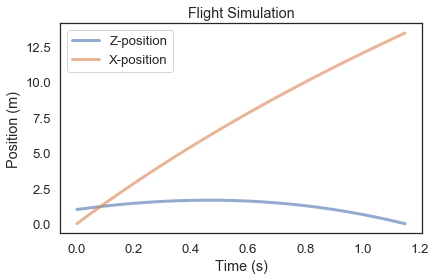

In [82]:
plot(results.zpos, label = 'Z-position')
plot(results.xpos, label = 'X-position')
decorate(xlabel = 'Time (s)', ylabel = 'Position (m)', title = 'Flight Simulation')

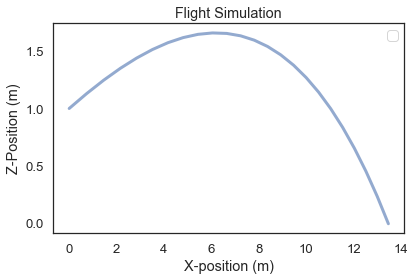

In [83]:
plot(results.xpos, results.zpos)
decorate(xlabel = 'X-position (m)', ylabel = 'Z-Position (m)', title = 'Flight Simulation')